In [ ]:
!pip install konlpy
!pip install wordcloud

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 50.2 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (41.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unab

In [3]:
import re
from datetime import datetime
import collections

import requests, json
from bs4 import BeautifulSoup
import urllib.parse as parse

from tqdm import tqdm
import pickle

import numpy as np
import pandas as pd
import sklearn as sk

from konlpy.tag import Okt # komoran, hannanum, kkma, mecab
import gensim

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import seaborn as sns
from wordcloud import WordCloud

# 브라우저에서 바로 그려지도록 
# %matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumSquareRound') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# Seaborn 테마 설정
sns.set_theme(style="ticks", color_codes=True, font='NanumSquareRound', font_scale=2)

# 워닝 메세지 삭제
import warnings
warnings.filterwarnings(action='ignore')

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

ModuleNotFoundError: ignored

In [ ]:
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

In [ ]:
# 피클 사용법
# list = ['a', 'b', 'c']
# with open('list.txt', 'wb') as f:
#   pickle.dump(list, f)

# with open('list.txt', 'rb') as f:
#   data = pickle.load(f)

In [ ]:
df = pd.read_csv('러시아 한국 경제.csv')

In [ ]:
def clean_content(content):
  stripped = content[69:-2]
  cleaned = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string=stripped)
  return cleaned

def clean_title(title):
  cleaned = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string=title)
  return cleaned

In [ ]:
df['내용'] = df['내용'].apply(clean_content)

In [ ]:
df['제목'] = df['제목'].apply(clean_title)

In [ ]:
df['제목내용'] = df['제목'] + ' ' + df['내용']

In [ ]:
okt = Okt()

doc_tokenized = df['제목내용'].apply(okt.morphs, stem= True)

# print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_tokenized)
# print(dictionary.token2id)
# print('dictionary size : %d' % len(dictionary))

In [ ]:
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

In [ ]:
# for doc in BoW_corpus:
#   #  print([[dictionary[id], freq] for id, freq in doc])
#    print([[id, freq] for id, freq in doc])

In [ ]:
tfidf = gensim.models.TfidfModel(BoW_corpus, smartirs='ntc')

In [ ]:
# for doc in tfidf[BoW_corpus]:
#   print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])
#   print([[id, np.around(freq, decimals=2)] for id, freq in doc])

In [7]:
# with open('tfidf.txt', 'wb') as f:
#   pickle.dump(tfidf, f)

# with open('tfidf.txt', 'rb') as f:
#   tfidf = pickle.load(f)

EOFError: ignored

In [ ]:
num = 0
for doc in tfidf[BoW_corpus]:
  for id, freq in doc:
    num += 1
print(num)

352663


In [ ]:
tfidf_dic = {dictionary.get(id): freq for doc in tfidf[BoW_corpus] for id, freq in doc}

In [ ]:
toDataFrame = {
  '단어': tfidf_dic.keys(),
  '빈도': tfidf_dic.values(),    
}

pd.DataFrame(toDataFrame)

In [ ]:
len(tfidf_dic)

23393

In [8]:
with open('tfidf_dic.txt', 'rb') as f:
  tfidf_dic = pickle.load(f)

In [9]:
tfidf_dic

{'.': 0.0026908559793839956,
 '10.4%': 0.03214627731285264,
 '10만': 0.007390652146907408,
 '11시': 0.04933051294167075,
 '13.6%': 0.041790003794083645,
 '14일': 0.014679985725004605,
 '1600원': 0.07184225089762669,
 '18.10%': 0.16543612293098856,
 '1만': 0.044102478100305945,
 '24.21%': 0.16543612293098856,
 '2분': 0.04228180641298763,
 '3490원': 0.16543612293098856,
 '34분': 0.16543612293098856,
 '43.7%': 0.038057450347734695,
 '47.3%': 0.054602141397950436,
 '535원': 0.16543612293098856,
 '6': 0.031133819686747013,
 '9800원': 0.16543612293098856,
 'DB': 0.021309299165614796,
 '가': 0.005698967758452882,
 '가격': 0.009708549975249505,
 '강세': 0.02558186224603236,
 '같다': 0.014341149898064244,
 '개': 0.02395809991254636,
 '거래': 0.03871151658911311,
 '것': 0.0011148011968085997,
 '경제': 0.012326391355585919,
 '고': 0.013931454405253714,
 '고공': 0.053834784132748864,
 '곡물': 0.10442681820286694,
 '과': 0.0029026247481342016,
 '관측': 0.08665548503290693,
 '국내': 0.02487395463878562,
 '급등': 0.015561362985043058,

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

In [ ]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000, font_path = font_path).fit_words(tfidf_dic)

In [ ]:
tfidf_dic['누에'], tfidf_dic['도넛']

(0.7768418306384682, 0.7213947231536749)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('러시아 한국 경제 워드클라우드.png')

In [ ]:
w_500 = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=500, font_path = font_path).fit_words(tfidf_dic)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(w_500)
plt.axis('off')
plt.savefig('러시아 한국 경제 워드클라우드.png')

In [ ]:
w_100 = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=100, font_path = font_path).fit_words(tfidf_dic)

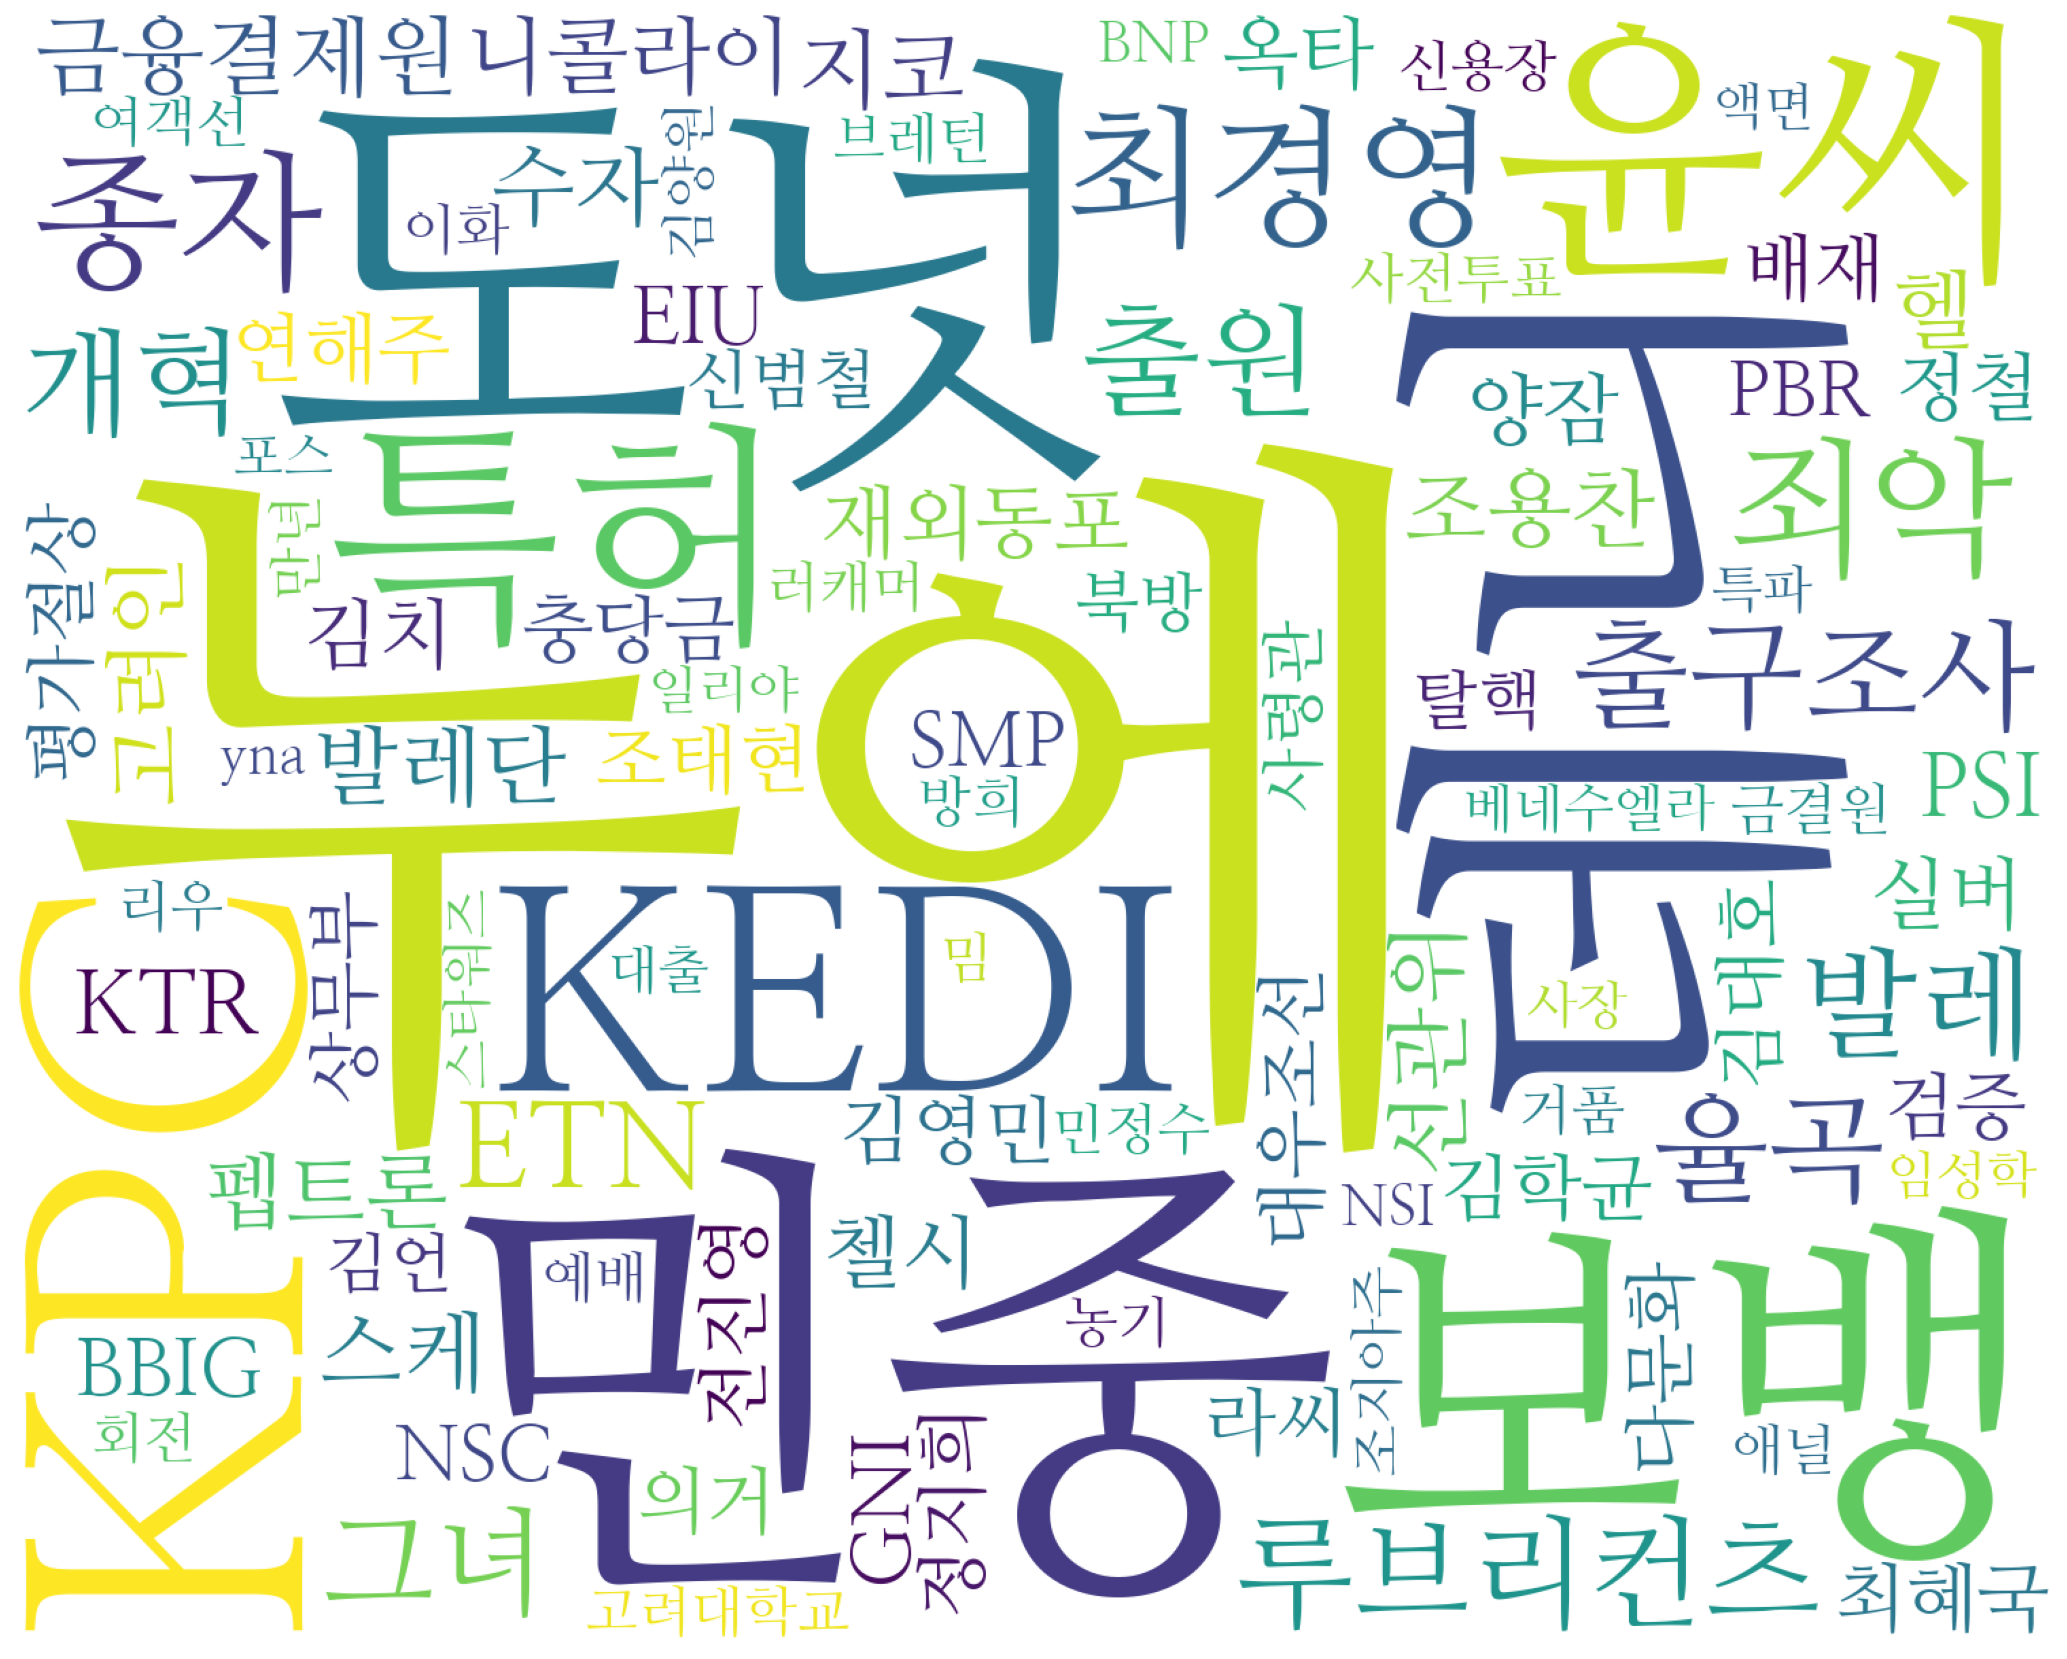

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(w_100)
plt.axis('off')
plt.savefig('러시아 한국 경제 워드클라우드_100.png')

In [ ]:
od = {v: k for k, v in tfidf_dic.items()}

In [ ]:
ordered_keys = sorted(od.keys())

In [ ]:
tfidf_od = {od[k]: k for k in ordered_keys}

0.7768418306384682

In [ ]:
keys = list(tfidf_od.keys())
keys.reverse()
for i in range(10):
  key = keys[i]
  print(key, tfidf_od[key])

누에 0.7768418306384682
민중 0.7537374073874383
데니 0.7509132030698813
도넛 0.7213947231536749
보뱅 0.6885122146645322
KPC 0.6878587003229988
윤씨 0.6876168483790275
KEDI 0.6588962246573309
특허 0.6488241288975194
최경영 0.6442260813100041
